In [309]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [310]:
# 1. -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
# 2. -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
# 3. ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)

In [311]:
def k(x):
    if n == 1:
        return -(4-x)/(5-2*x)
    if n == 2:
        return -(7-x)/(8+3*x)
    if n == 3:
        return (x - 2) / (x + 2)

In [312]:
def p(x):
    if n == 1:
        return ((1-x)/2)
    if n == 2:
        return (1+x/3)
    if n == 3:
        return x

In [313]:
def q(x):
    if n == 1:
        return 1/2*math.log(3+x)
    if n == 2:
        return (1-1/2*math.exp(x/2))
    if n == 3:
        return 1 - math.sin(x)


In [314]:
def f(x):
    if n == 1:
        return 1 + x/3
    if n == 2:
        return 1/2-x/3 
    if n == 3:
        return x * x


In [315]:
def a():
    if n == 1:
        return -1
    if n == 2:
        return -1
    if n == 3:
        return -1

In [316]:
def b():
    if n == 1:
        return 1
    if n == 2:
        return 1
    if n == 3:
        return 1

In [317]:
def A_p():
    if n == 1:
        return 0
    if n == 2:
        return 0
    if n == 3:
        return 0

In [318]:
def B_p():
    if n == 1:
        return 0
    if n == 2:
        return 0
    if n == 3:
        return 0

In [319]:
def alpha1():
    if n == 1:
        return 1
    if n == 2:
        return 1
    if n == 3:
        return 1
    

In [320]:
def alpha2():
    if n == 1:
        return 0
    if n == 2:
        return 0
    if n == 3:
        return 0

In [321]:
def beta1():
    if n == 1:
        return 1
    if n == 2:
        return 1 
    if n == 3:
        return 1

In [322]:
def beta2():
    if n == 1:
        return 0
    if n == 2:
        return 0
    if n == 3:
        return 0


In [323]:
def find_coef(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h):
    n_ = round((b - a) / h)
    x = np.zeros(n_ + 1, dtype=float)
    for i in range(n_ + 1):
        x[i] = a + i * h
    A = np.zeros(n_ + 1, dtype=float)
    B = np.zeros(n_ + 1, dtype=float)
    C = np.zeros(n_ + 1, dtype=float)
    D = np.zeros(n_ + 1, dtype=float)
    A[0] = 0
    A[n_] = -beta2
    B[0] = h * alpha1 - alpha2
    B[n_] = h * beta1 + beta2
    C[0] = alpha2
    C[n_] = 0
    D[0] = h * A_c
    D[n_] = h * B_c
    for i in range(1, n_):
        A[i] = 2 * k(x[i]) - h * p(x[i])
        B[i] = -4 * k(x[i]) + 2 * h * h * q(x[i])
        C[i] = 2 * k(x[i]) + h * p(x[i])
        D[i] = 2 * h * h * f(x[i])
    return A, B, C, D


In [324]:
def find_solution(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h):
    n_ = round((b - a) / h)
    A, B, C, D = find_coef(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h)
    s = np.zeros(n_ + 1, dtype=float)
    t = np.zeros(n_ + 1, dtype=float)
    y = np.zeros(n_ + 1, dtype=float)
    s[0] = - C[0] / B[0]
    t[0] = D[0] / B[0]
    for i in range(1, n_ + 1):
        s[i] = -C[i] / (A[i] * s[i - 1] + B[i])
        t[i] = (D[i] - A[i] * t[i - 1]) / (A[i] * s[i - 1] + B[i])
    y[n_] = t[n_]
    for i in range(n_ - 1, -1, -1):
        y[i] = s[i] * y[i + 1] + t[i]
    return y

In [325]:
def grid(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h, eps):
    coef = 2
    k_grid = 0
    v2 = find_solution(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h)
    while True:
        k_grid += 1
        v1 = v2
        v2 = find_solution(a, b, alpha1, alpha2, beta1, beta2, A_c, B_c, h / (coef ** k_grid))
        err = np.zeros(v1.shape[0], dtype=float)
        for i in range(v1.shape[0]):
            err[i] = (v2[i * 2] - v1[i]) / (coef ** 1 - 1)
        if np.linalg.norm(err) < eps:
            for i in range(n + 1):
                if i % 2 == 0:
                    v2[i * 2] += err[i]
                else:
                    v2[i] += (err[i - 1] + err[i + 1]) / 2
            x = np.zeros(v2.shape[0], dtype=float)
            for i in range(v2.shape[0]):
                x[i] = a + i * h / (coef ** k_grid)
            return x, v2, h / (coef ** k_grid), k_grid

In [326]:
# 1. -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
# 2. -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
# 3. ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)

In [327]:
def print_task(n):
    if n == 1:
        return("-(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)")
    if n == 2:
        return("-(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)")
    if n == 3:
        return("((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)")
# 1. -u'' + x^2 * u = (pi^2 / 4 + x^2) * cos(pi * x / 2)    u(0) = 1, u(1) = 0 (пример из Амосова)
# 2. -1 / (x+3) * u''- x * u' + ln(2 + x) * u = 1 - x / 2    u′(−1) = u′(1) + 1 / 2 * u(1) = 0 (5 вариант из Пакулиной)
# 3. ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)    

Пример:  -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
Погрешность 0.01
Шаг конечной сетки = 0.1
Количество шагов сгущения сетки: 1


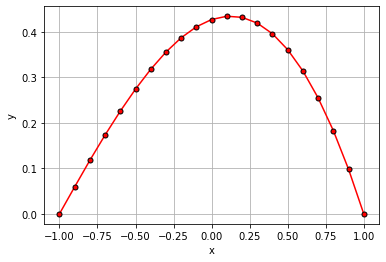

Пример:  -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
Погрешность 0.001
Шаг конечной сетки = 0.05
Количество шагов сгущения сетки: 2


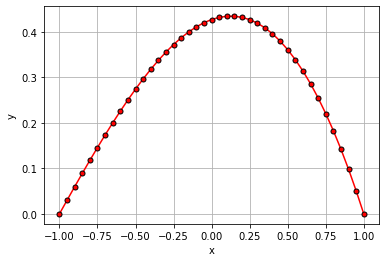

Пример:  -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
Погрешность 0.0001
Шаг конечной сетки = 0.00625
Количество шагов сгущения сетки: 5


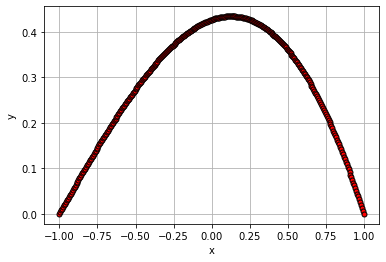

Пример:  -(4-x)/(5-2*x)*u'' + ((1-x)/2) * u' + 1/2*ln(3+x)*u = 1 + x/3    u(-1) = u(1) = 0 (8 вариант из Пакулиной)
Погрешность 1e-05
Шаг конечной сетки = 0.0015625
Количество шагов сгущения сетки: 7


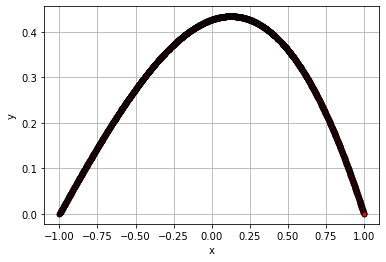

Пример:  -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
Погрешность 0.01
Шаг конечной сетки = 0.1
Количество шагов сгущения сетки: 1


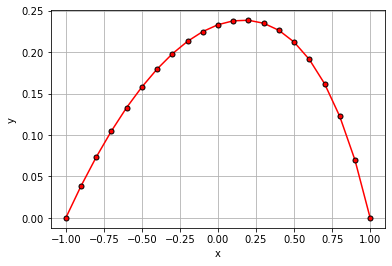

Пример:  -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
Погрешность 0.001
Шаг конечной сетки = 0.1
Количество шагов сгущения сетки: 1


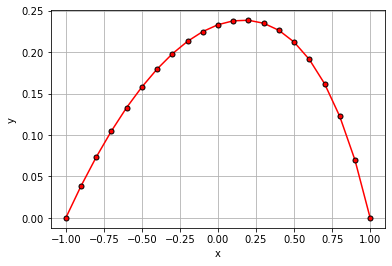

Пример:  -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
Погрешность 0.0001
Шаг конечной сетки = 0.025
Количество шагов сгущения сетки: 3


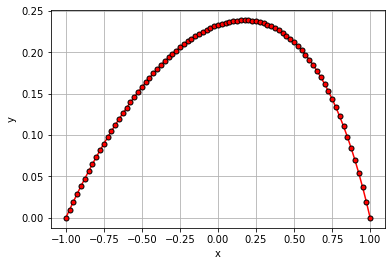

Пример:  -(7-x)/(8+3*x) * u''+ (1+x/3) * u' + (1-1/2*exp(x/2)) * u = 1/2-x/3    u(-1) = u(1) = 0 (11 вариант из Пакулиной)
Погрешность 1e-05
Шаг конечной сетки = 0.00625
Количество шагов сгущения сетки: 5


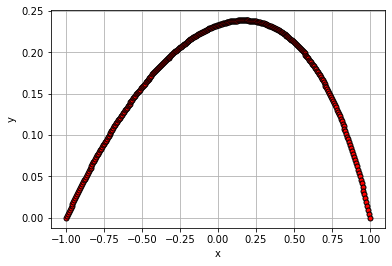

Пример:  ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)
Погрешность 0.01
Шаг конечной сетки = 0.1
Количество шагов сгущения сетки: 1


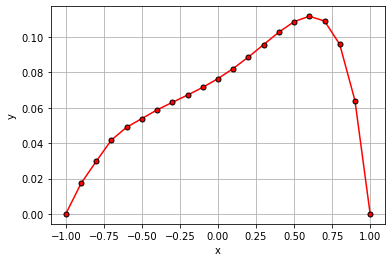

Пример:  ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)
Погрешность 0.001
Шаг конечной сетки = 0.0125
Количество шагов сгущения сетки: 4


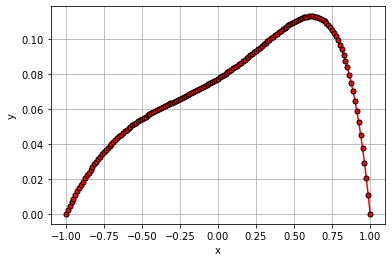

Пример:  ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)
Погрешность 0.0001
Шаг конечной сетки = 0.003125
Количество шагов сгущения сетки: 6


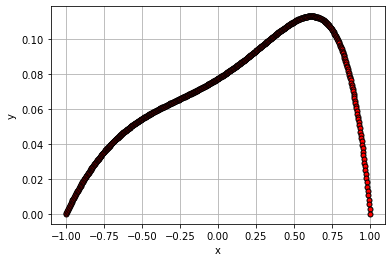

Пример:  ((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0 (6 вариант из Пакулиной)
Погрешность 1e-05
Шаг конечной сетки = 0.00078125
Количество шагов сгущения сетки: 8


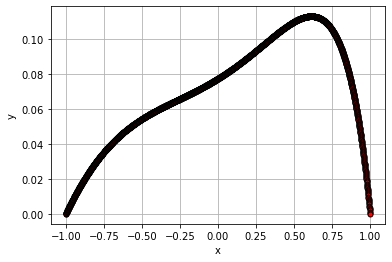

In [328]:
for n in range(1, 4):
    for indicator in range(2,6):
        eps = 10**(-indicator)
        h = np.abs(b() - a()) / 10
        x, y, h_new, k_grid = grid(a(), b(), alpha1(), alpha2(), beta1(), beta2(), A_p(), B_p(), h, eps)
        print("Пример: ", print_task(n))
        print("Погрешность", eps)
        print("Шаг конечной сетки =", h_new)
        print("Количество шагов сгущения сетки:", k_grid)
        plt.plot(x, y, marker='.', color='red', mec='black', ms=10)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()